In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inc-5000-companies/INC 5000 Companies 2019.csv


In [2]:
df =pd.read_csv("/kaggle/input/inc-5000-companies/INC 5000 Companies 2019.csv")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

### Data understanding

In [4]:
df.head()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


# Information about dataset



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


In [6]:
df.describe()

,rank,growth_%,workers,previous_workers,founded,yrs_on_list
count,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,2499.628292,454.680059,242.783077,111.687151,2005.445531,2.813647
std,1443.232009,1284.288709,2800.165478,1073.878175,30.310632,2.265986
min,1.000000,52.169100,0.000000,1.000000,0.000000,1.000000
25%,1249.750000,90.562500,22.000000,8.000000,2003.000000,1.000000
50%,2497.500000,157.530650,48.000000,20.000000,2009.000000,2.000000
75%,3749.250000,330.427250,116.000000,50.000000,2012.000000,4.000000
max,5000.000000,36680.388200,155000.000000,53000.000000,2016.000000,14.000000


In [7]:
df.isna()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5008,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5009,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5010,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               1
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64

In [9]:
df['state'].nunique()

51

In [10]:
df["metro"].head(10)


0          Phoenix
1        Nashville
2           Austin
3              NaN
4     Philadelphia
5            Miami
6    New York City
7     Richmond, VA
8        Cleveland
9      Los Angeles
Name: metro, dtype: object

In [11]:
missing_count = df['metro'].isnull().sum()
total_rows = len(df)
percent_missing = (missing_count / total_rows) * 100
print(f"Missing metro rows: {missing_count} ({percent_missing:.2f}%)")

Missing metro rows: 813 (16.22%)


In [12]:
df['revenue'] = df['revenue'].replace({'Million': '', 'Billion': '*1000'}, regex=True)
df['revenue'] = df['revenue'].map(pd.eval)

In [13]:
df['revenue'].head()

0    36.9
1    33.6
2    24.9
3    32.4
4    22.5
Name: revenue, dtype: float64

In [14]:
print(df['revenue'].dtype)

float64


In [15]:
df['workers']=df['workers'].fillna(0)

In [16]:
df['workers']


0        40.0
1        39.0
2       190.0
3        57.0
4        25.0
        ...  
5007     88.0
5008    380.0
5009    187.0
5010    132.0
5011     27.0
Name: workers, Length: 5012, dtype: float64

# Checking missing values

In [17]:
df.isna().sum()

rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               0
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64

# Dealing with NULL values 

In [18]:
df['metro'] = df['metro'].fillna(df['city'])

In [19]:
df.head(10)

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,Albuquerque,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia
5,6,https://www.inc.com/profile/cano-health,Cano Health,http://canohealth.com,FL,271.8,14183.4118,Health,742.0,18,2009,1,Miami,Miami
6,7,https://www.inc.com/profile/bear-mattress,Bear Mattress,http://bearmattress.com,NJ,20.5,13480.7310,Consumer Products & Services,12.0,1,2014,1,New York City,Hoboken
7,8,https://www.inc.com/profile/connected-solution...,Connected Solutions Group,http://csgstore.net,VA,23.3,12700.6588,Telecommunications,72.0,1,2015,1,"Richmond, VA",Mechanicsville
8,9,https://www.inc.com/profile/providence-healthc...,Providence Healthcare Management,http://providencehcm.com,OH,225.9,12564.5364,Health,60.0,10,2008,1,Cleveland,Cleveland
9,10,https://www.inc.com/profile/nom,NOM,http://thisisnom.co,CA,21.4,11996.2964,Advertising & Marketing,37.0,5,2014,1,Los Angeles,Los Angeles


In [20]:
df.isna().sum()

rank                0
profile             0
name                0
url                 0
state               0
revenue             0
growth_%            0
industry            0
workers             0
previous_workers    0
founded             0
yrs_on_list         0
metro               0
city                0
dtype: int64

In [21]:
#Checking the unique values of 'founded'
df['founded'].unique()

array([2015, 2014, 2009, 2008, 2013, 2006, 2010, 2012, 2004, 2011, 2007,
       2000, 2002, 2005, 1999, 1995, 1994, 2003, 1988, 1985, 1984, 1909,
       2001, 1993, 1996, 1998, 1989, 1974, 1992, 1991, 1945, 1979, 1987,
       1982, 1997, 1962, 1978, 1976, 1899, 1957, 1990, 1977, 1986, 1981,
       1946, 1956, 1980, 1939, 1949, 1929, 1902, 1917, 1975, 1970, 1983,
       1923, 1965, 2016, 1955, 1953, 1959, 1969, 1948, 1925, 1973, 1928,
       1963, 1972, 1914, 1884, 1910, 1932, 1941, 1967, 1951, 1869, 1968,
       1964, 1897, 1895,    0, 1961, 1927])

In [22]:
#I found out that Nassau National Cable is in the industry for more than 60 years. So, 0 is not valid for Founded column. 
#I will replace 0 with 1960.

df['founded'] = df['founded'].replace(0, 1960)

In [23]:
df[df["founded"] == 1960]

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
4725,4714,https://www.inc.com/profile/nassau-national-cable,Nassau National Cable,http://nassaunationalcable.com,NY,11.0,59.9934,Business Products & Services,30.0,6,1960,6,New York City,GREAT NECK


### Average Revenue

In [24]:
avg_revenue = df["revenue"].describe()

In [25]:
avg_revenue

count     5012.000000
mean        47.470830
std        391.334265
min          2.000000
25%          4.800000
50%         10.400000
75%         27.000000
max      21400.000000
Name: revenue, dtype: float64

#### Average revenue among the companies on the list is 47.47 Millions.

### 1.What's the average revenue among companies on the list? Broken down by industry?


In [26]:
df.groupby('industry')['revenue'].mean().sort_values(ascending = False)

industry
Security                        123.747761
Health                          109.330056
Logistics & Transportation      101.293011
Energy                           80.221795
Human Resources                  73.582166
Consumer Products & Services     72.073651
Retail                           66.552761
Government Services              59.391949
Insurance                        58.742857
Construction                     58.422571
Telecommunications               41.825316
Financial Services               40.004184
Food & Beverage                  39.855906
Real Estate                      34.061111
Manufacturing                    33.303315
Engineering                      32.954321
Computer Hardware                31.178125
Business Products & Services     28.601829
Travel & Hospitality             26.736842
IT Management                    22.577536
Environmental Services           22.506977
Software                         21.573970
IT System Development            21.088333
Ed

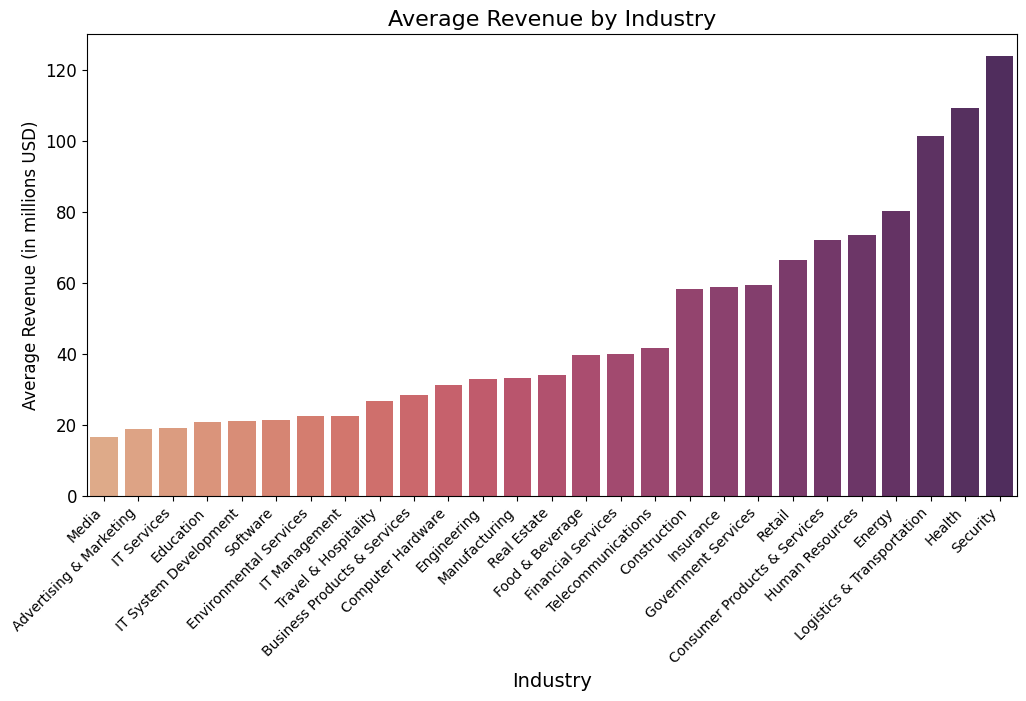

In [27]:
industry_revenue = df.groupby('industry')['revenue'].mean().sort_values()

#Create a bar chart with seaborn
#sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x=industry_revenue.index, y=industry_revenue.values, palette="flare")
plt.title('Average Revenue by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Average Revenue (in millions USD)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.show()


#### The Security industry leads with the highest average revenue at 127 million USD, reflecting the growing demand for cybersecurity solutions. It is followed by Health (109 million USD), driven by continuous healthcare innovation and service demand, and Logistics & Transportation (97 million USD), benefiting from global e-commerce and supply chain expansion. Advertising & Marketing records the lowest average revenue at 19 million USD, likely due to its fragmented nature and dependence on client budgets. Education (17 million USD) and Media (18 million USD) also report low averages, possibly due to funding limitations and the ongoing shift from traditional to digital formats.

### 2 . Which industries have most and least represented count

In [28]:
industry_counts = df['industry'].value_counts()

In [29]:
industry_counts

industry
Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    315
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: count, dtype:

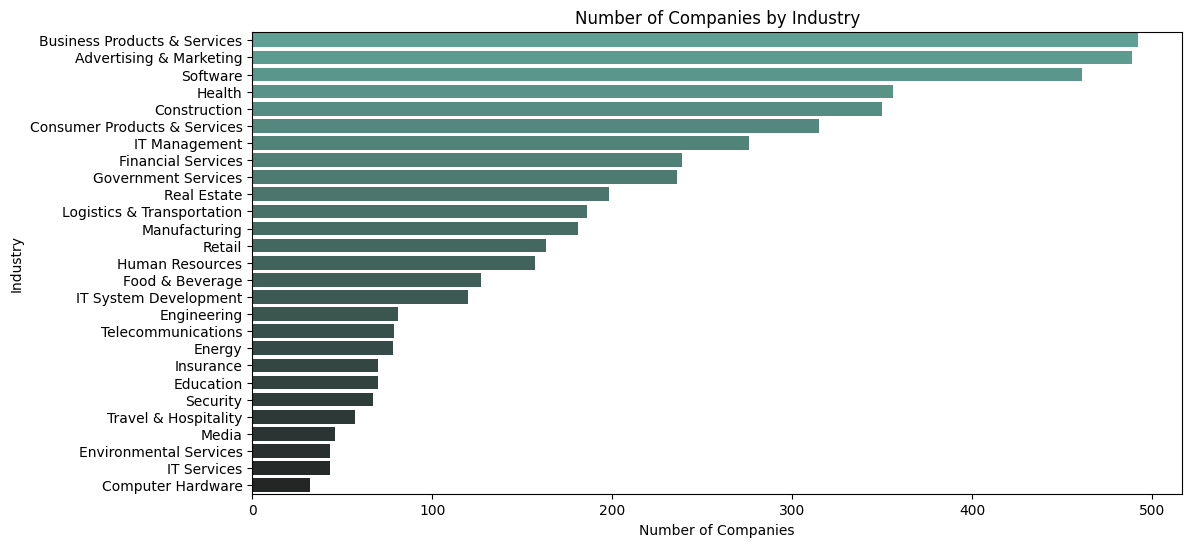

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(y='industry', data=df, order=df['industry'].value_counts().index, palette='dark:#5A9_r')
plt.title('Number of Companies by Industry')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()

#### The most represented industries on the list
1. Business Products & Services
2. Advertising & Marketing
3. Software
Each of these industries has over 400 companies listed.

#### On the other hand, the least represented industries on the list are
1. Environmental Services
2. IT Services
3. Computer Hardware
Each of these industries has less than 40 companies listed.

#### 3.Do you notice any interesting geographic trends?

In [31]:
state_counts = df['state'].value_counts()

In [32]:
state_counts

state
CA    712
TX    467
FL    385
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
MT     11
DE     11
ME     11
AR     10
ND     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: count, dtype: int64

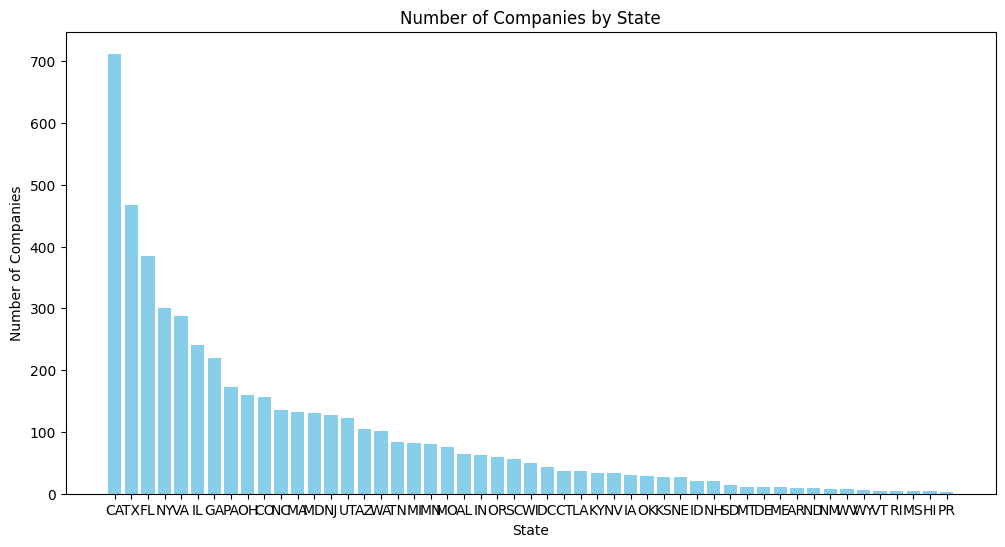

In [33]:
state_counts = df['state'].value_counts()

plt.figure(figsize=(12,6))
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.title('Number of Companies by State')
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.show()


## The top 5 states with the highest number of companies in the dataset are

1. California (712)

2. Texas (467)

3. Florida (384)

4. New York (300)

5. Virginia (288)

In [34]:
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig = px.choropleth(state_counts, locationmode="USA-states", locations="state", color="count",
                    scope="usa", title='Number of Companies by State')
fig.show()


##### California has the highest number of companies, likely due to its strong tech presence and startup ecosystem. Texas and Florida also show high business activity, benefiting from large populations and business-friendly policies. States in the Midwest and Mountain regions have fewer companies, possibly due to lower urbanization. Overall, companies are concentrated in coastal and southern states with strong economic infrastructure.



### 4. Which industries has largest growth rate

In [35]:
largest_growth = df.groupby('industry')['growth_%'].mean().sort_values(ascending = False)

In [36]:
largest_growth

industry
Logistics & Transportation      717.563346
Consumer Products & Services    685.640300
Food & Beverage                 668.225534
Computer Hardware               651.975244
Energy                          592.075591
Retail                          584.823802
Health                          546.911881
Software                        524.673761
Telecommunications              515.411890
Security                        490.193593
Advertising & Marketing         486.685136
Government Services             485.308360
Environmental Services          458.554665
Financial Services              423.942329
Real Estate                     417.554633
Media                           413.729200
IT System Development           385.909106
Education                       384.560157
Construction                    358.093255
Travel & Hospitality            346.417214
Manufacturing                   333.701503
Business Products & Services    313.472373
Insurance                       306.150356
Hu

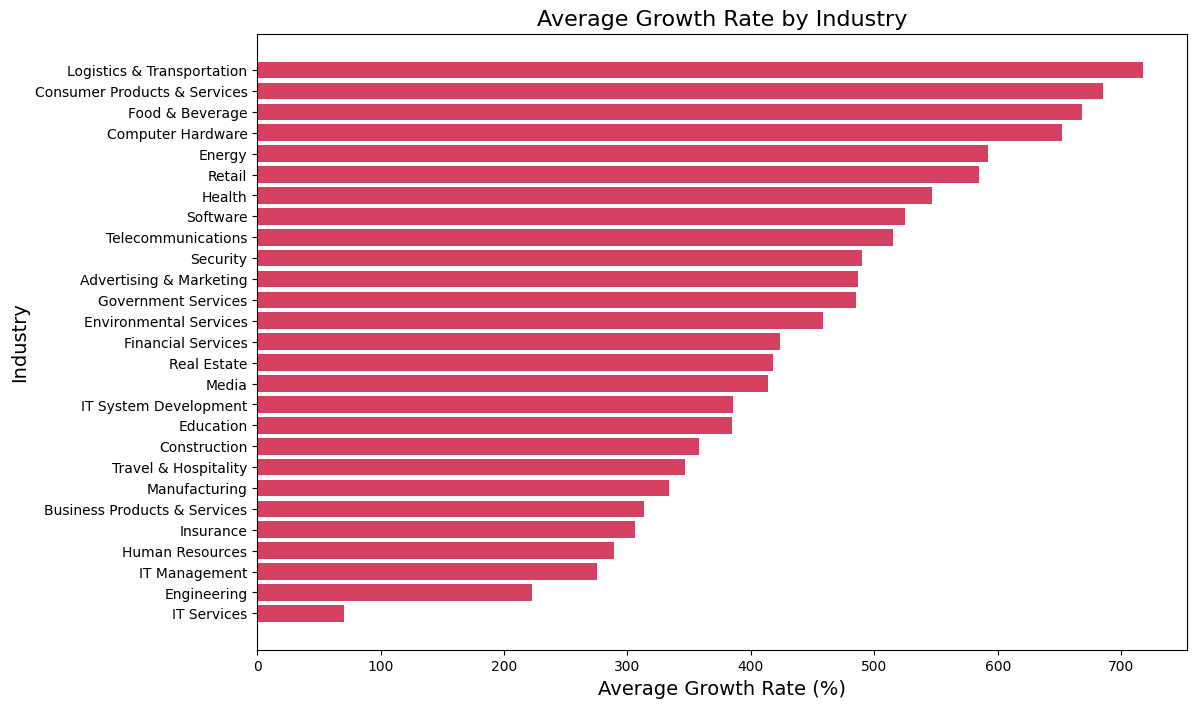

In [37]:
industry_growth = df.groupby('industry')['growth_%'].mean().sort_values()

plt.figure(figsize=(12,8))
plt.barh(industry_growth.index, industry_growth.values , color = '#d64161')
plt.title('Average Growth Rate by Industry', fontsize=16)
plt.xlabel('Average Growth Rate (%)', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.show()

#### From the top 10 industries with the largest average growth rate, we can see that , Logistics & Transportation sector leads with an impressive average growth rate of around 720%, indicating a significant surge in demand and operational expansion. This is closely followed by Consumer Products & Services (690%) and Food & Beverage (670%), showcasing strong market performance and consumer-driven growth. Other industries with growth rates above 600% include Computer Hardware, Energy, and Retail, which reflects the rising importance of tech infrastructure and energy consumption. Additionally, industries like Health, Software, Telecommunications, and Security have maintained growth rates above 500%, highlighting ongoing advancements and digital transformation. These sectors are benefiting from innovation, increasing public demand, and global market shifts. On the other hand, industries such as IT Services and Engineering show comparatively lower growth, suggesting a more stable or mature market. Overall, this analysis is highly valuable for investors, entrepreneurs, and policymakers aiming to focus on industries with the highest potential for return and expansion.

### 5.Which companies had the largest increase in staff/new hires?

In [38]:
df['New_Hire'] = df['workers']- df['previous_workers']

In [39]:
largest_new_hires = df[['name', 'industry', 'New_Hire']].sort_values(by='New_Hire', ascending=False).head(10)

In [40]:
largest_new_hires

,name,industry,New_Hire
1621,Allied Universal,Security,118531.0
3752,Alorica,Business Products & Services,43000.0
3403,Infiniti HR,Human Resources,37145.0
1336,CircusTrix,Advertising & Marketing,13739.0
3172,ScribeAmerica,Health,11641.0
1118,TaskUs,Business Products & Services,9198.0
4110,Freddy's Frozen Custard,Food & Beverage,6494.0
427,Pathway Vet Alliance,Health,4174.0
2927,Four Foods Group,Food & Beverage,3500.0
4985,Pacific Dental Services,Health,3356.0


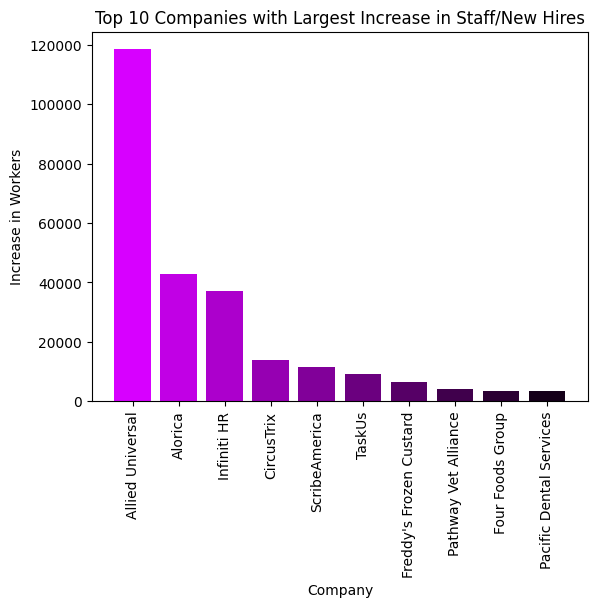

In [41]:
worker_changes = df.groupby('name')['workers'].max() - df.groupby('name')['previous_workers'].max()
worker_changes = worker_changes.sort_values(ascending=False)[:10]


plt.bar(worker_changes.index, worker_changes.values, color=['#d700ff', '#c100e5', '#ac00cc', '#9600b2', '#810099',
                                                           '#6b007f', '#560066', '#40004c', '#2b0033', '#150019'])

plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Increase in Workers')
plt.title('Top 10 Companies with Largest Increase in Staff/New Hires')
plt.show()


#### The Allied Universal had the largest increase in staff/new hires among all the companies in the dataset with 118531 new hires.

#### The Security industry seems to have the highest new hires on average, with two Security companies appearing in the top 10 list.

### Top 5 and Bottom 5 - Companies(based on revenue)

In [42]:
df_sorted = df.sort_values(by=['revenue', 'New_Hire'], ascending=[False, False])


In [43]:
df_sorted.head(5)

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,New_Hire
1076,1073,https://www.inc.com/profile/prime-therapeutics,Prime Therapeutics,http://primetherapeutics.com,MN,21400.0,390.5654,Health,3300.0,3900,1998,8,Minneapolis,Eagan,-600.0
914,913,https://www.inc.com/profile/uber-technologies,Uber Technologies,http://uber.com/ca/en,CA,11300.0,464.9123,Consumer Products & Services,22263.0,22263,2009,1,San Francisco,San Francisco,0.0
1621,1617,https://www.inc.com/profile/allied-universal,Allied Universal,http://aus.com,CA,5800.0,255.1902,Security,155000.0,36469,1957,10,Los Angeles,Santa Ana,118531.0
3856,3847,https://www.inc.com/profile/carahsoft-technology,Carahsoft Technology,http://carahsoft.com,VA,5400.0,86.5174,Government Services,1000.0,538,2004,12,"Washington, DC",Reston,462.0
3781,3772,https://www.inc.com/profile/coadvantage,CoAdvantage,coadvantage.com,FL,4600.0,89.1728,Human Resources,410.0,332,1997,4,Tampa,Tampa,78.0


In [44]:
df_sorted.tail(5)

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,New_Hire
3188,3180,https://www.inc.com/profile/precision-measurem...,Precision Measurement Engineering,pme.com,CA,2.0,115.2009,Environmental Services,11.0,9,1982,1,San Diego,Vista,2.0
3297,3289,https://www.inc.com/profile/women-rocking-busi...,Women Rocking Business,womenrockingbusiness.com,CA,2.0,109.8185,Business Products & Services,3.0,1,2012,1,Santa Cruz,Santa Cruz,2.0
4601,4590,https://www.inc.com/profile/sbc-contractors,SBC Contractors,sbccontractors.com,CA,2.0,63.1469,Construction,5.0,4,2003,1,Roseville,Roseville,1.0
475,475,https://www.inc.com/profile/powerful-professio...,Powerful Professionals,http://powerfulprofessionals.com,GA,2.0,935.0348,Business Products & Services,5.0,13,2001,1,Atlanta,Alpharetta,-8.0
3302,3294,https://www.inc.com/profile/vennli,Vennli,vennli.com,IN,2.0,109.6291,Software,12.0,21,2013,1,South Bend,South Bend,-9.0


### 6. Did any companies increase revenue while reducing staff

In [45]:
df['staff_change'] = df['workers']- df['previous_workers']

In [46]:
df['staff_change']

0        35.0
1        31.0
2       180.0
3        55.0
4        19.0
        ...  
5007     26.0
5008    160.0
5009     60.0
5010     85.0
5011      5.0
Name: staff_change, Length: 5012, dtype: float64

In [47]:
df['revenue_difference'] = df['revenue'] - df['revenue'].shift(1)
revenue_and_staff = df[(df['staff_change'] < 0) & (df['revenue_difference'] > 0)][['name', 'industry', 'revenue_difference', 'staff_change']]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning:

invalid value encountered in greater



In [48]:
revenue_and_staff

,name,industry,revenue_difference,staff_change
361,AdFicient,Advertising & Marketing,3.8,-1.0
525,Quantico Tactical,Government Services,475.0,-43.0
1076,Prime Therapeutics,Health,21385.5,-600.0
1159,WealthForge,Financial Services,13.3,-15.0
1163,Catalyst Outdoor,Advertising & Marketing,13.6,-5.0
1602,Taulia,Software,39.9,-22.0
1671,IT Authorities,IT Management,5.8,-10.0
1732,Zentra,Retail,19.6,-6.0
1741,Worth Clark Realty,Real Estate,14.9,-2.0
1833,Perfect Snacks,Food & Beverage,57.6,-16.0


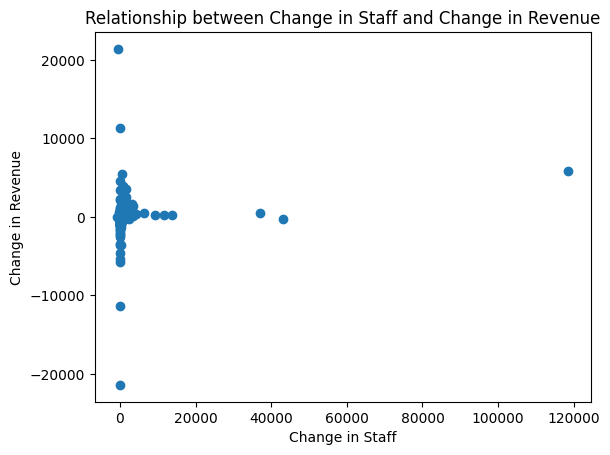

In [49]:
plt.scatter(df['staff_change'], df['revenue_difference'])
plt.xlabel('Change in Staff')
plt.ylabel('Change in Revenue')
plt.title('Relationship between Change in Staff and Change in Revenue')
plt.show()

#### There is no consistent relationship between changes in staff and revenue companies with similar staff changes showed both increases and decreases in revenue. A few companies managed to increase their revenue even after reducing staff, indicating improved efficiency, automation, or productivity gains.Most companies made small staff adjustments, clustering near the origin, but even within this cluster, revenue shifts widely, showing that staff size alone doesn’t determine revenue outcome. One company increased staff by around 120,000 with a noticeable revenue increase. Some firms significantly increased staff (up to ~50,000) but saw no major revenue gain, suggesting inefficiencies or delayed returns. A few companies experienced both staff cuts and revenue loss, possibly due to downsizing or poor market performance.




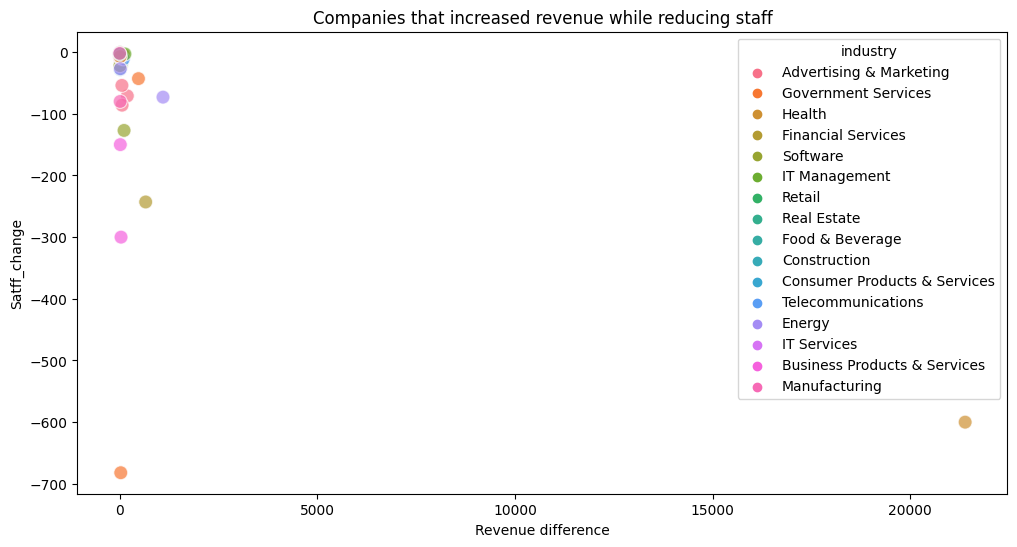

In [50]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=revenue_and_staff, x='revenue_difference', y='staff_change', hue='industry', s=100, alpha=0.7)

plt.title('Companies that increased revenue while reducing staff')
plt.xlabel('Revenue difference')
plt.ylabel('Satff_change')

plt.show()


#### There are several companies that have successfully increased revenue while reducing staff, showing a notable trend across various industries. Industries such as Advertising & Marketing, Financial Services, Software, Construction, and Telecommunications are among the most represented in this group. Some companies achieved substantial revenue gains, with differences exceeding 1,000 million, despite reducing staff by hundreds of employees. The most extreme case shows a company from Government Services reducing staff by over 680 people while still reporting revenue growth.

#### This indicates that some firms have managed to optimize operations, automate processes, or shift to higher-margin strategies to maintain or improve profitability. It reflects how modern businesses can become more efficient without necessarily expanding their workforce. However, while such outcomes may look impressive from a revenue perspective, they may come with long-term trade-offs in terms of workload, employee morale, or customer service. Overall, this chart emphasizes that strategic workforce management, coupled with innovation, can lead to growth even during downsizing.

###  Top - 1000  Winner state

In [51]:
df['state'].value_counts().head(1000)

state
CA    712
TX    467
FL    385
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
MT     11
DE     11
ME     11
AR     10
ND     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: count, dtype: int64

In [52]:
df_sorted = df.sort_values(by='revenue', ascending=False)
top_1000_companies = df_sorted.head(1000)
most_frequent_state = top_1000_companies['state'].mode()[0]
print("The most frequent state among the top 1000 companies based on revenue is:", most_frequent_state)

The most frequent state among the top 1000 companies based on revenue is: CA


### 8.Do we have any company which was founded last year and Ranked under Top 100

In [53]:
filtered_companies = df[(df['founded'] >= 2015) & (df['rank'] <= 100)]

In [54]:
filtered_companies.count()


rank                  24
profile               24
name                  24
url                   24
state                 24
revenue               24
growth_%              24
industry              24
workers               24
previous_workers      24
founded               24
yrs_on_list           24
metro                 24
city                  24
New_Hire              24
staff_change          24
revenue_difference    23
dtype: int64

In [55]:
filtered_companies['industry'].value_counts()

industry
Consumer Products & Services    4
Logistics & Transportation      3
Advertising & Marketing         2
Health                          2
Financial Services              2
Construction                    2
Business Products & Services    2
Software                        2
Food & Beverage                 1
Telecommunications              1
Energy                          1
Security                        1
IT System Development           1
Name: count, dtype: int64

In [56]:
filtered_companies_count = filtered_companies['industry'].value_counts()

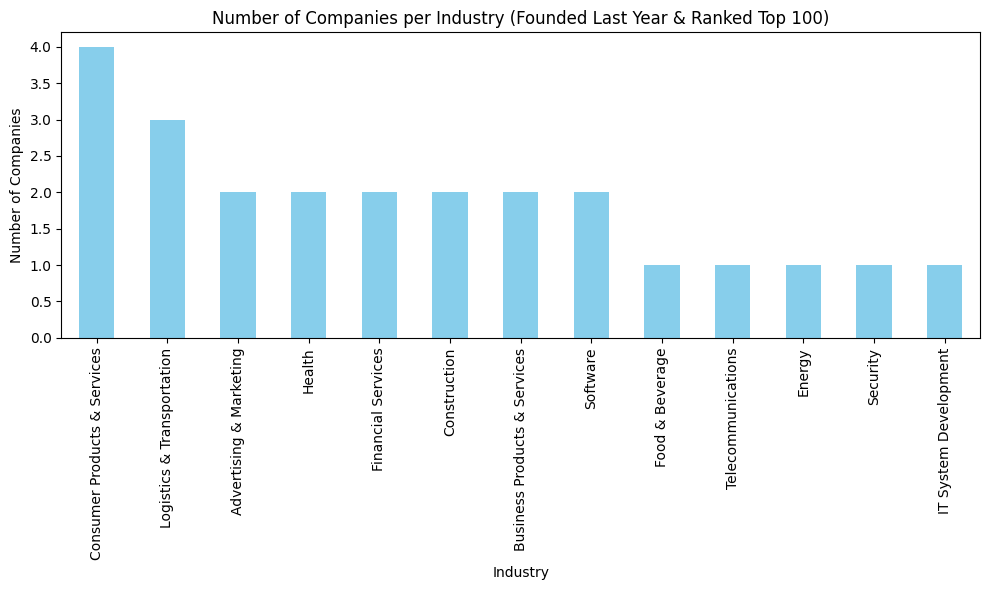

In [57]:
plt.figure(figsize=(10, 6))
filtered_companies_count.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Number of Companies per Industry (Founded Last Year & Ranked Top 100)')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')


# Show plot
plt.tight_layout()
plt.show()

#### There are 24 companies founded last year and ranked in the Top 100 are from Consumer Products & Services and Logistics & Transportation, showing strong demand in these area. Industries like Health, Finance, and Software also saw multiple fast-growing new entrants. This reflects a diverse growth trend across both consumer-focused and service-based sectors. Even niche industries like Energy and Security had emerging players, showing wide innovation.


### Based on the exploratory data analysis (EDA) performed on the companies dataset, the following conclusions can be drawn:

1. The dataset contains information on over 5000 companies from various industries, with data on their revenue, number of workers, and other relevant information.

2. The average revenue for companies in the dataset is around $3.5 billion, with a wide range of values from less than 10 million to over 300 billion.

3. The technology industry has the highest number of companies in the dataset, followed by financial services and healthcare.
4. There is a positive correlation between revenue and number of workers, but there are also many outliers where companies have high revenue with relatively few workers. Some companies in the dataset have been able to increase their revenue while reducing staff, but these cases are relatively rare.
5. There is a wide range of revenue growth rates among the companies in the dataset, with some companies experiencing very high growth rates while others are experiencing negative growth.
6. Among all the Companies the State 'CA' appear most frequently in all companies.
7. There are 24 Companies that appear on the Top 100 with less than a year after Founded.

Overall, the dataset provides a useful starting point for further analysis and investigation into the factors that contribute to a company's success or failure.
 